### Project Brief

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends.

The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

In [1]:
# Note that all source file to be placed under the data folder in present directory.
import os
os.getcwd()

'C:\\Users\\pc'

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing pandas and numpy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [4]:
#reading loan.csv
df = pd.read_csv(filepath_or_buffer="CarPrice_Assignment.csv", low_memory=False)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.shape

(205, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.CarName.value_counts()

toyota corolla        6
peugeot 504           6
toyota corona         6
subaru dl             4
honda civic           3
                     ..
audi fox              1
plymouth duster       1
alfa-romero giulia    1
nissan dayz           1
mercury cougar        1
Name: CarName, Length: 147, dtype: int64

#### The CompanyName are spelled wrong for some values hence fixing it

In [9]:
df["CompanyName"]=df.CarName.apply(lambda x: x.split()[0])

def replace_name(x,y):
    return df["CompanyName"].replace(x,y,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')
replace_name('Nissan','nissan')

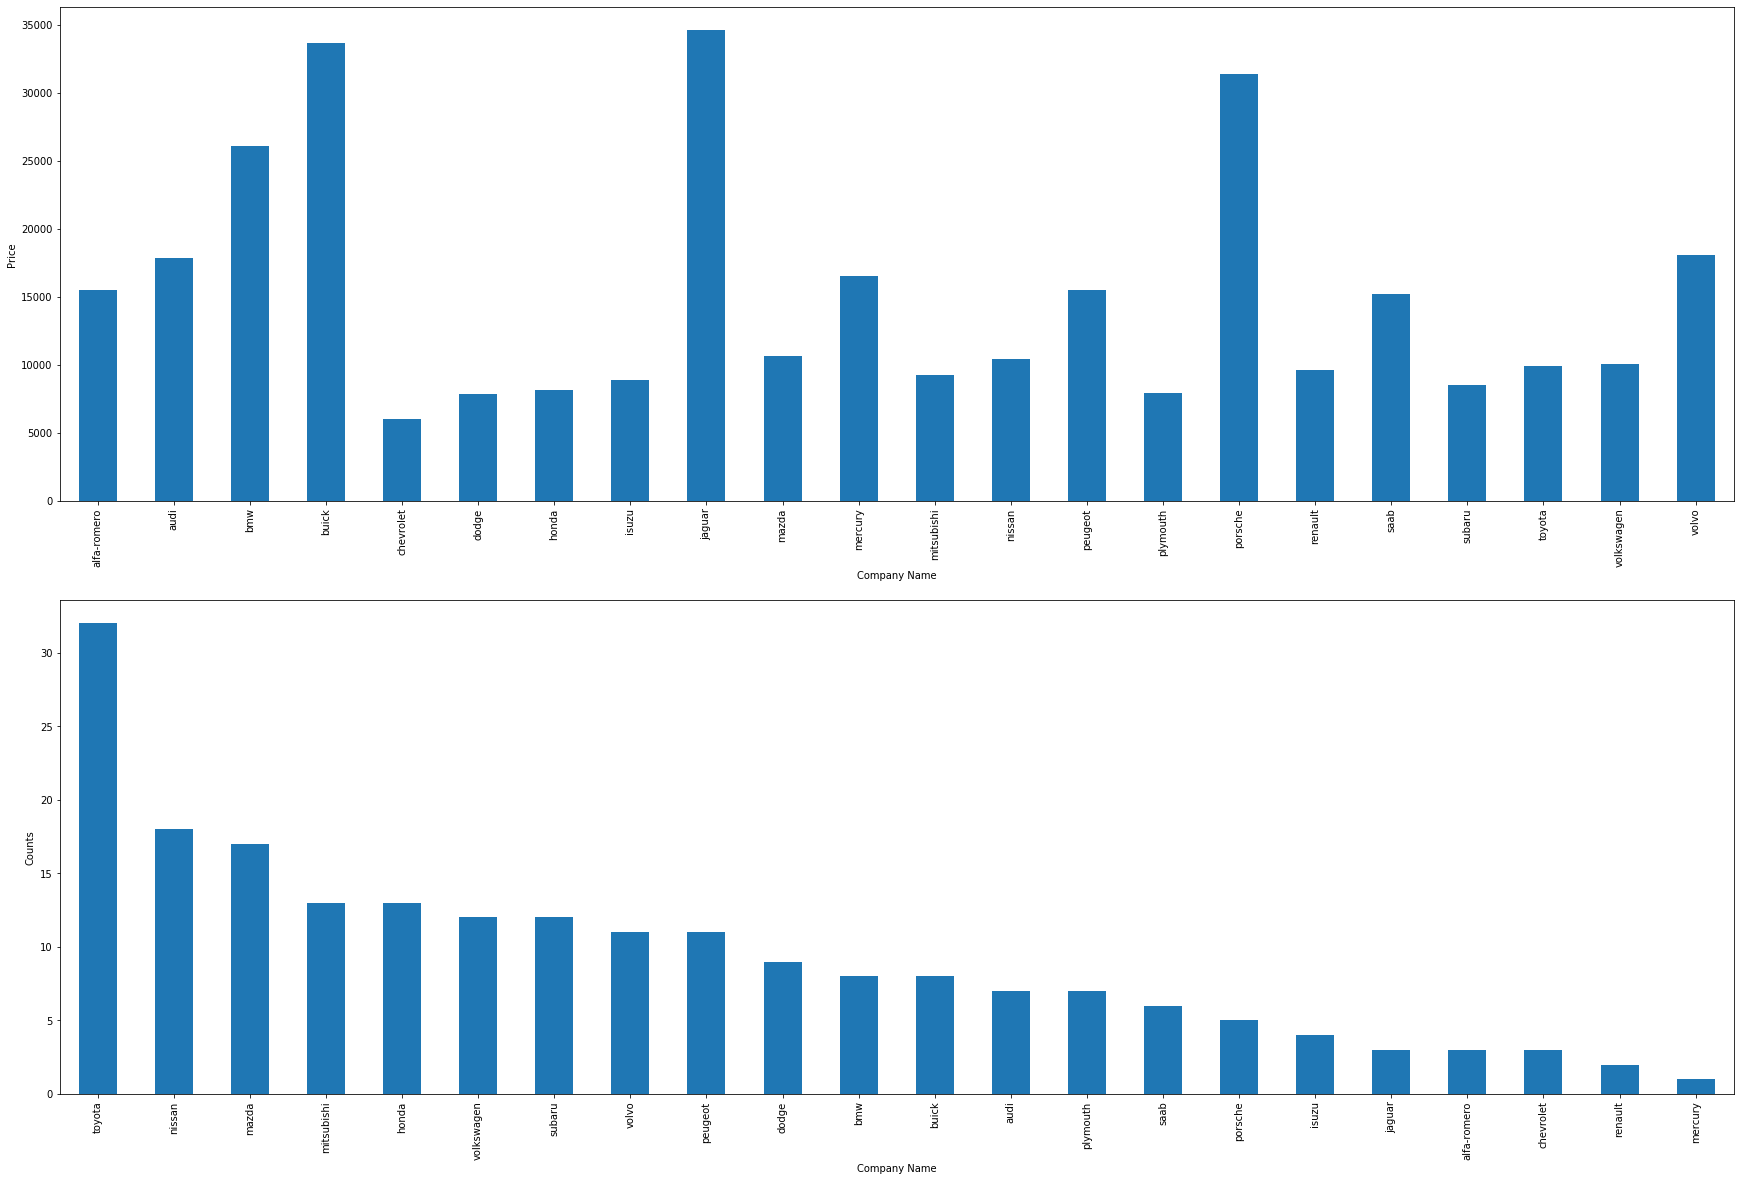

In [10]:
plt.figure(figsize=(30,20))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.subplot(2,1,1)

plot1=df.groupby(["CompanyName"])["price"].mean().plot.bar()
plot1.set(xlabel="Company Name",ylabel="Price")

plt.subplot(2,1,2)
plot2=df.CompanyName.value_counts().plot.bar()
plot2.set(xlabel="Company Name",ylabel="Counts")

plt.show()

#### Inference 
- We can observe that jaguar company is producing the most expensive cars
- And toyota is the company with maximum no.of models of car

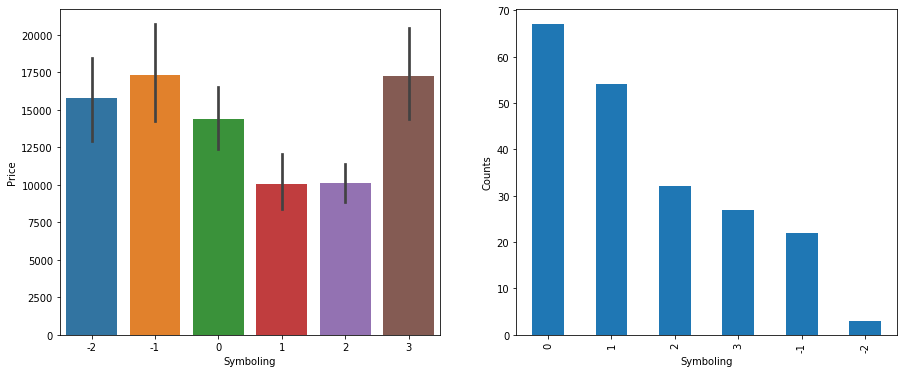

In [11]:
plt.figure(figsize=(15,6))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1,2,1)
plot1=sns.barplot(x="symboling",y="price",data=df)
plot1.set(xlabel="Symboling",ylabel="Price")

plt.subplot(1,2,2)
plot2=df.symboling.value_counts().plot.bar()
plot2.set(xlabel="Symboling",ylabel="Counts")

plt.show()


#### Inference 
- We can observe that no such specific trend can be infered through this graph, symboling of -1 and 3 are the cars costing more then others
- Data of cars with 0 symbols are in more no. 


### Visualizing Numerical Variable

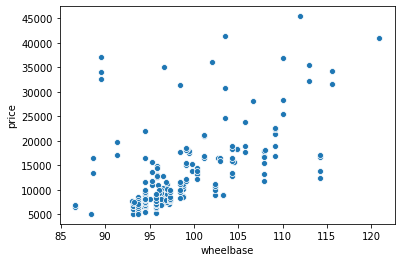

In [12]:
sns.scatterplot(x="wheelbase",y="price",data=df)
plt.show()

#### Inference
- Wheelbase is failrly linearly distributed with price

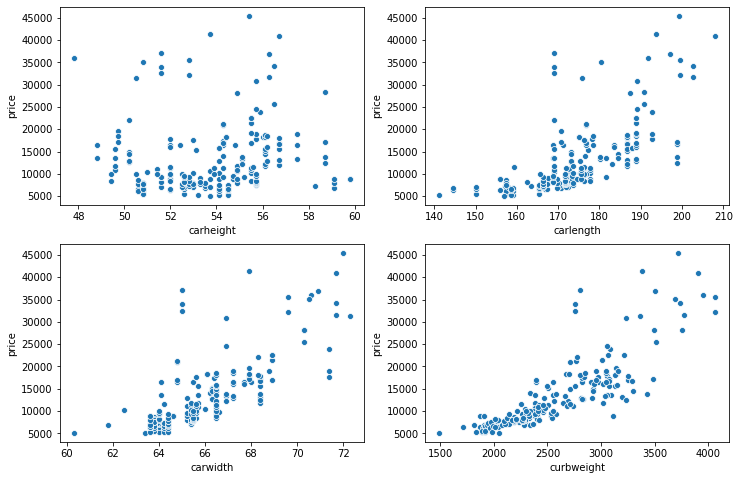

In [13]:
#VISUALIZING numerical variable

plt.figure(figsize=(12, 8))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(2,2,1)
sns.scatterplot(x="carheight",y="price",data=df)

plt.subplot(2,2,2)
sns.scatterplot(x="carlength",y="price",data=df)

plt.subplot(2,2,3)
sns.scatterplot(x="carwidth",y="price",data=df)

plt.subplot(2,2,4)
sns.scatterplot(x="curbweight",y="price",data=df)

plt.show()

#### Inference 
- we can see that carlength, carwidth and curbweight is significantly showing the linear increase of price
- while carheight are randomly distributed

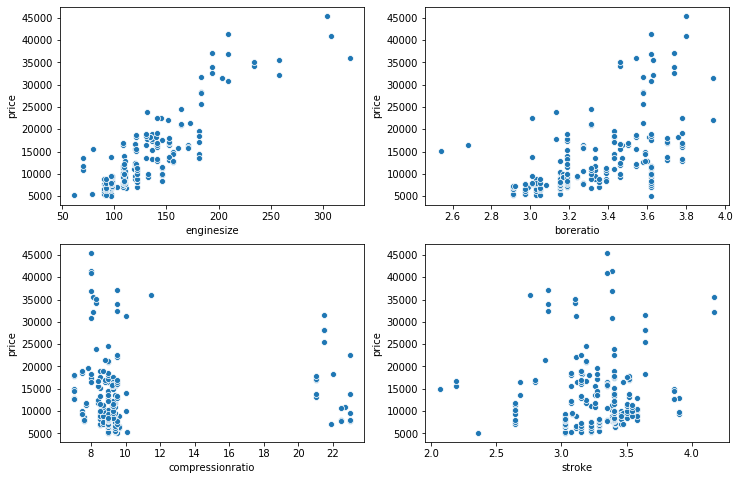

In [14]:
#VISUALIZING numerical variable
plt.figure(figsize=(12, 8))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(2,2,1)
sns.scatterplot(x="enginesize",y="price",data=df)

plt.subplot(2,2,2)
sns.scatterplot(x="boreratio",y="price",data=df)

plt.subplot(2,2,3)
sns.scatterplot(x="compressionratio",y="price",data=df)

plt.subplot(2,2,4)
sns.scatterplot(x="stroke",y="price",data=df)

plt.show()

#### Inference 
- we can see that enginesize is significantly showing the linear increase of price
- while boreratio, compressionratio and stroke are randomly distributed

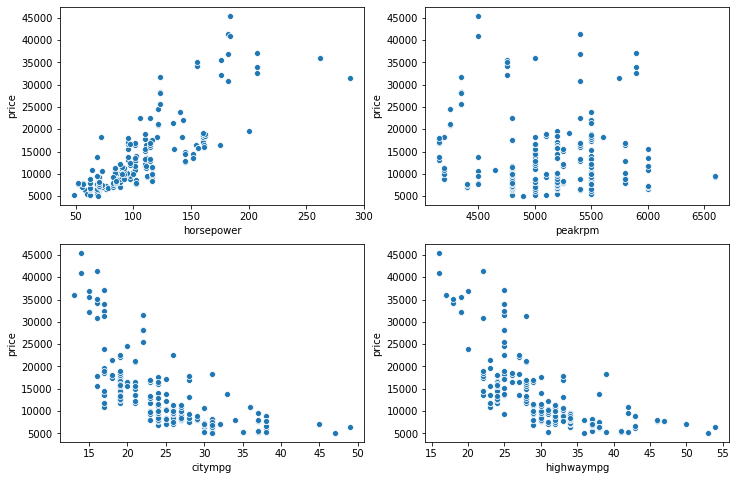

In [15]:
#VISUALIZING numerical variable
plt.figure(figsize=(12, 8))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.subplot(2,2,1)
sns.scatterplot(x="horsepower",y="price",data=df)
plt.subplot(2,2,2)
sns.scatterplot(x="peakrpm",y="price",data=df)
plt.subplot(2,2,3)
sns.scatterplot(x="citympg",y="price",data=df)
plt.subplot(2,2,4)
sns.scatterplot(x="highwaympg",y="price",data=df)

#### Inference 
- we can see that horsepower, citympg, highwaympg is showing linear relationship with price 
- while peakrpm is randomply distributed and showing no trend


### Visualizing Numerical Variable

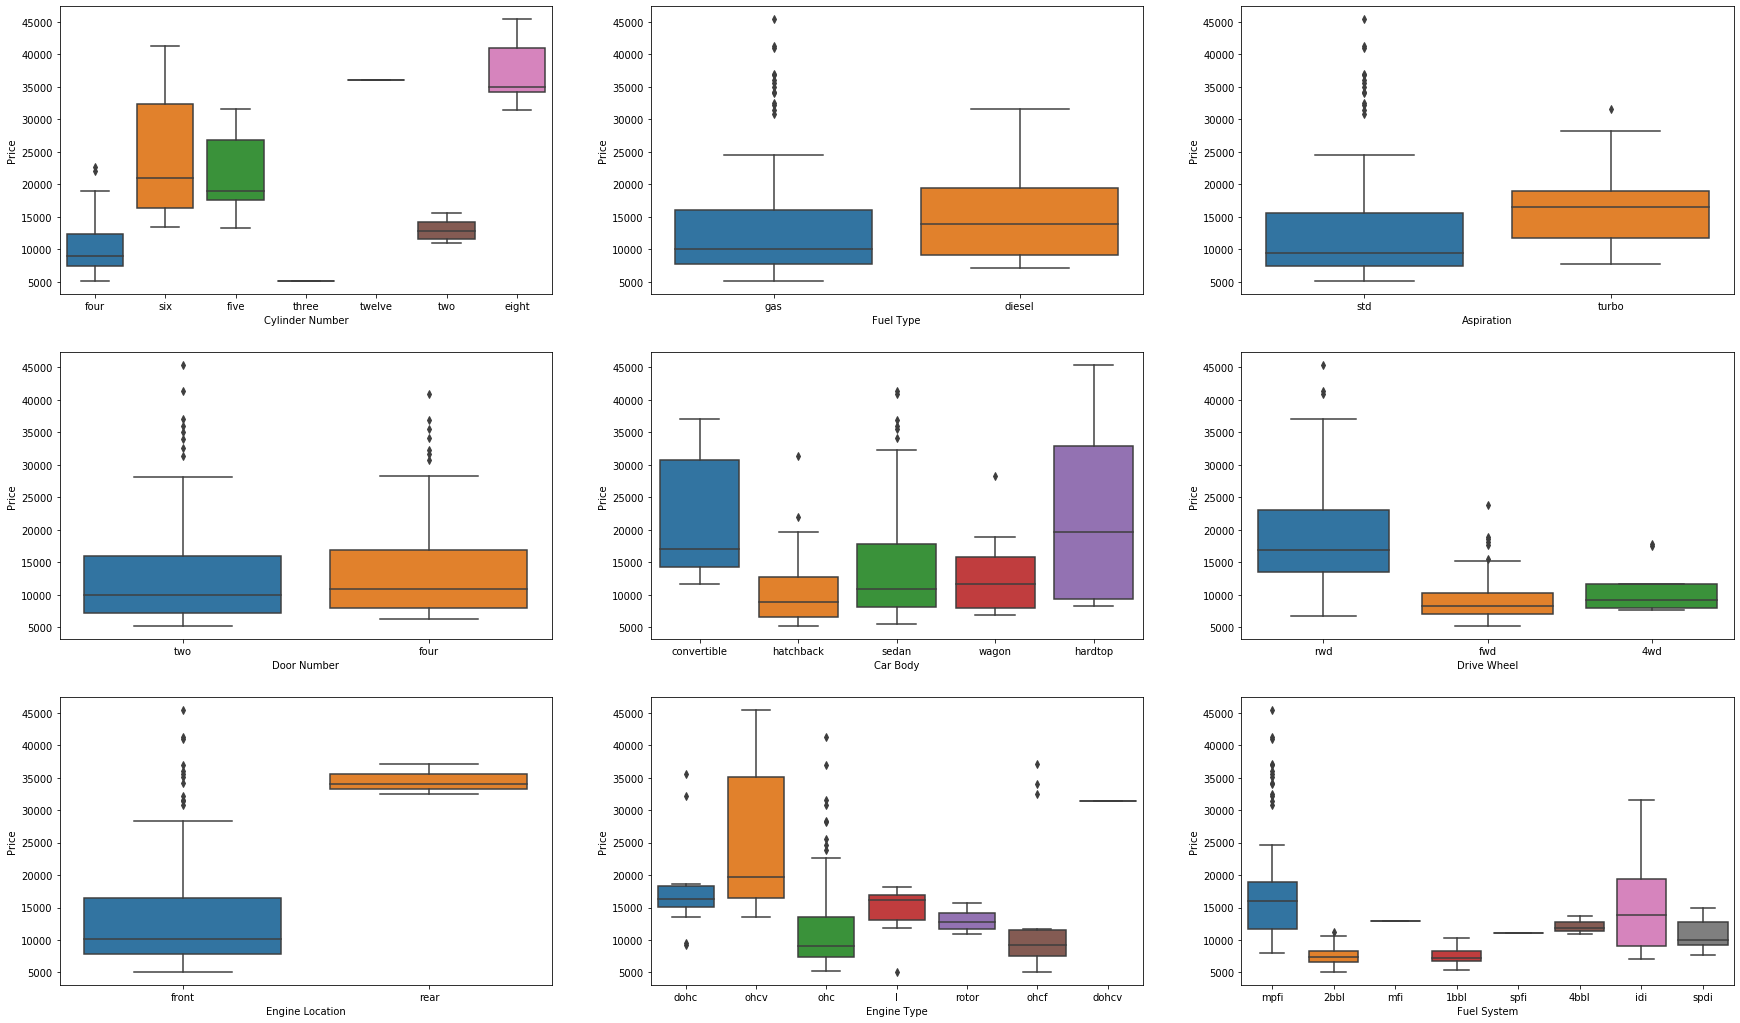

In [16]:
# increase figure size 
plt.figure(figsize=(30, 18))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(3,3,1)
plot1=sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plot1.set(xlabel="Cylinder Number",ylabel="Price")

plt.subplot(3,3,2)
plot2=sns.boxplot(x = 'fueltype', y = 'price', data = df)
plot2.set(xlabel="Fuel Type",ylabel="Price")

plt.subplot(3,3,3)
plot3=sns.boxplot(x = 'aspiration', y = 'price', data = df)
plot3.set(xlabel="Aspiration",ylabel="Price")

plt.subplot(3,3,4)
plot4=sns.boxplot(x = 'doornumber', y = 'price', data = df)
plot4.set(xlabel="Door Number",ylabel="Price")

plt.subplot(3,3,5)
plot5=sns.boxplot(x = 'carbody', y = 'price', data = df)
plot5.set(xlabel="Car Body",ylabel="Price")

plt.subplot(3,3,6)
plot6=sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plot6.set(xlabel="Drive Wheel",ylabel="Price")

plt.subplot(3,3,7)
plot7=sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plot7.set(xlabel="Engine Location",ylabel="Price")

plt.subplot(3,3,8)
plot8=sns.boxplot(x = 'enginetype', y = 'price', data = df)
plot8.set(xlabel="Engine Type",ylabel="Price")

plt.subplot(3,3,9)
plot9=sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plot9.set(xlabel="Fuel System",ylabel="Price")

plt.show()

#### Inference
- We can observe that the price does not depend on doornumber 
- We can oberseve in all other variable there are types which contribute to increase the price of car 
  - Price of car with no. of 12 cylinder is highest
  - Desels Cars price is more comparatively gas
  - Aspiration of turbo in cars has higher price
  - Hardtop type car body have highest cost
  - Cars in which Drive Wheel is rwd has more cost
  - If Engine location is in rear side then the cost is more
  - If Engine type is dohcv then price is high
  - Car with mpfi fuel system are of higher cost   


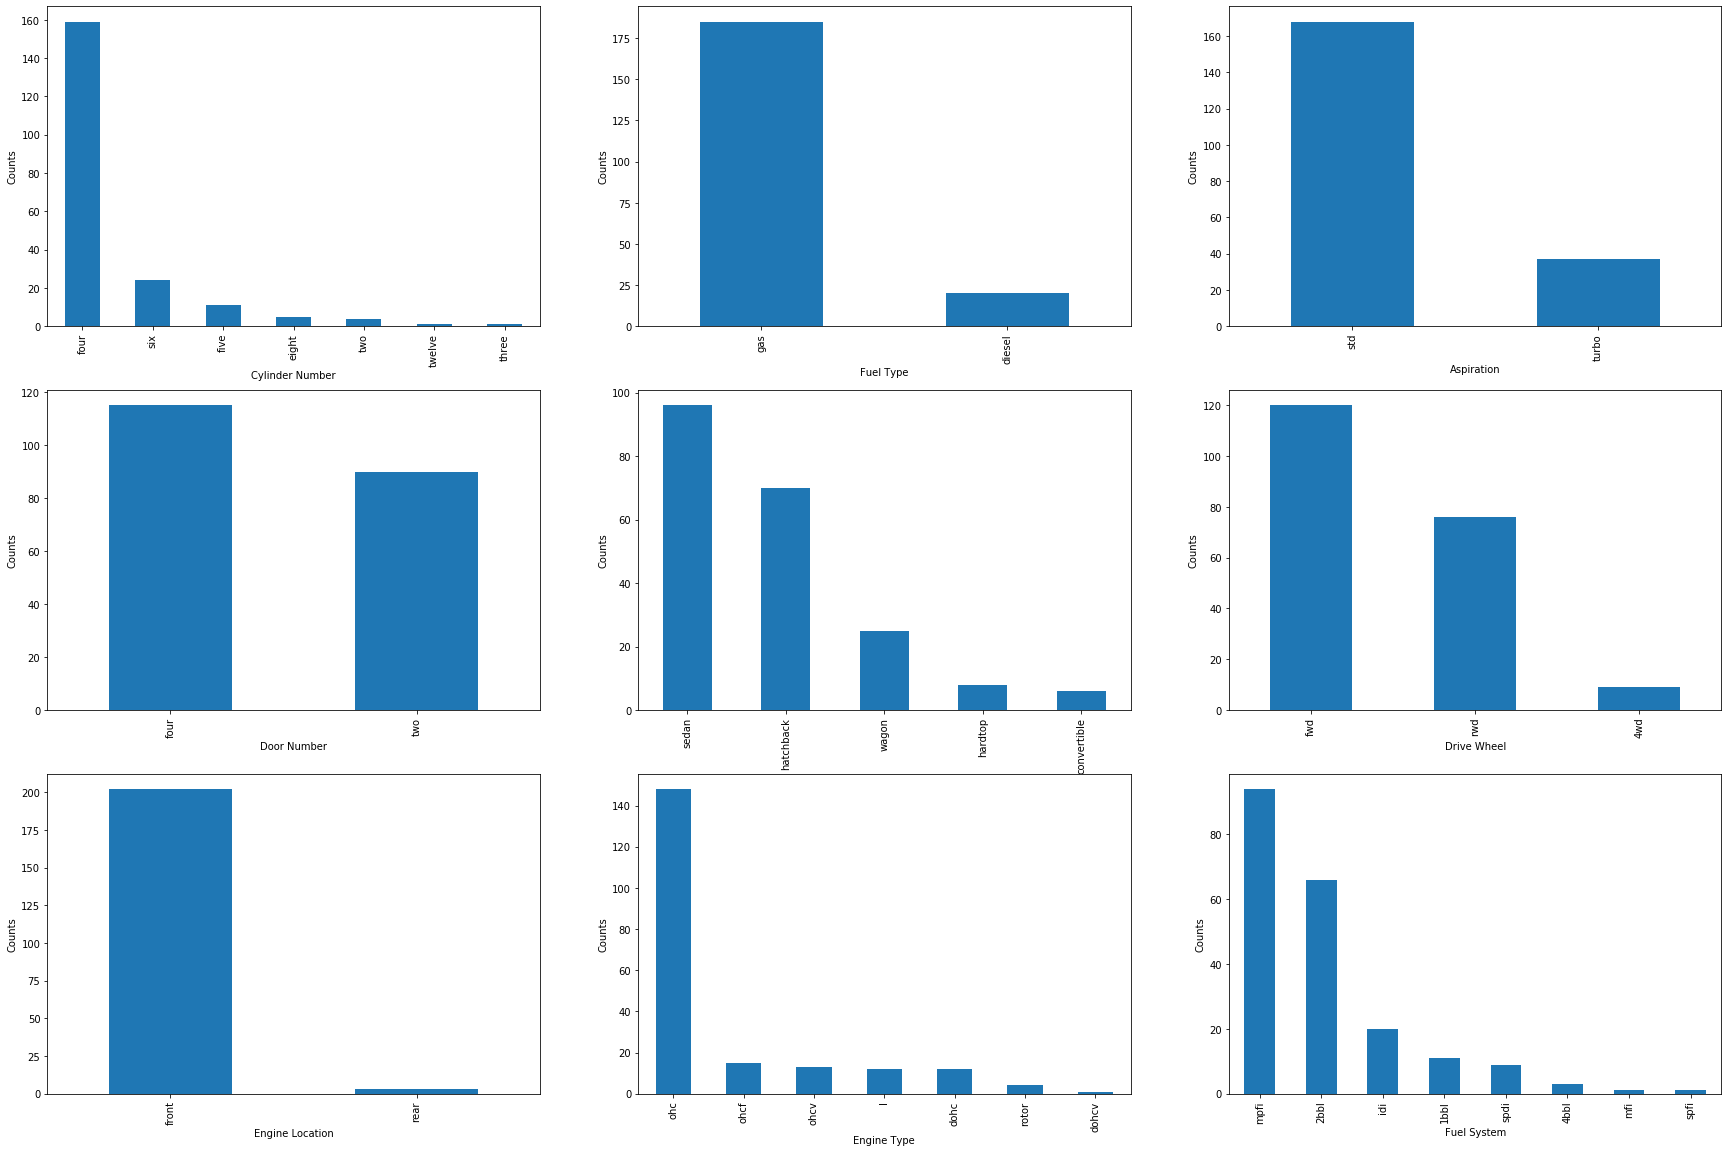

In [17]:
plt.figure(figsize=(30, 20))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(3,3,1)
plot1=df.cylindernumber.value_counts().plot.bar()
plot1.set(xlabel="Cylinder Number",ylabel="Counts")

plt.subplot(3,3,2)
plot2=df.fueltype.value_counts().plot.bar()
plot2.set(xlabel="Fuel Type",ylabel="Counts")

plt.subplot(3,3,3)
plot3=df.aspiration.value_counts().plot.bar()
plot3.set(xlabel="Aspiration",ylabel="Counts")

plt.subplot(3,3,4)
plot4=df.doornumber.value_counts().plot.bar()
plot4.set(xlabel="Door Number",ylabel="Counts")

plt.subplot(3,3,5)
plot5=df.carbody.value_counts().plot.bar()
plot5.set(xlabel="Car Body",ylabel="Counts")

plt.subplot(3,3,6)
plot6=df.drivewheel.value_counts().plot.bar()
plot6.set(xlabel="Drive Wheel",ylabel="Counts")

plt.subplot(3,3,7)
plot7=df.enginelocation.value_counts().plot.bar()
plot7.set(xlabel="Engine Location",ylabel="Counts")

plt.subplot(3,3,8)
plot8=df.enginetype.value_counts().plot.bar()
plot8.set(xlabel="Engine Type",ylabel="Counts")

plt.subplot(3,3,9)
plot9=df.fuelsystem.value_counts().plot.bar()
plot9.set(xlabel="Fuel System",ylabel="Counts")

plt.show()

#### Inference
- We can observe how the categorical data is distributed with the levels


#### Bucketing the target variable "price" grouping with CompanyName

In [18]:
# deriving the new column
df['price'] = df['price'].astype('int')
temp = df.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
df['carsrange'] = pd.cut(temp['price_y'],bins=3,right=False,labels=['economic','medium','luxury'])



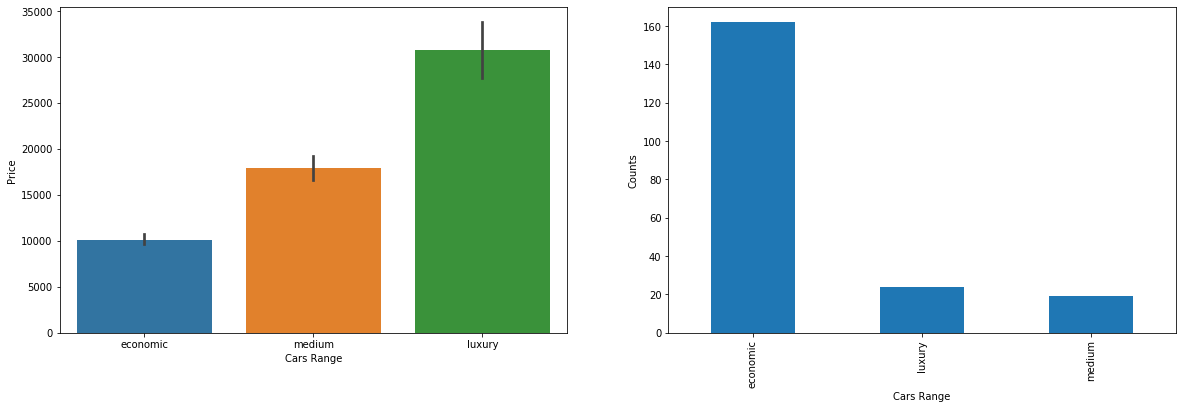

In [19]:
# increase figure size 
plt.figure(figsize=(20,6))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

#ploting the graph against price and carsrange
plt.subplot(1,2,1)
plot=sns.barplot(x="carsrange",y="price",data=df)
plot.set(xlabel="Cars Range",ylabel="Price")

plt.subplot(1,2,2)
countplot=df.carsrange.value_counts().plot.bar()
countplot.set(xlabel="Cars Range",ylabel="Counts")

plt.show()

#### Inference
- We can observe that the price car is linearly increasing among economic, medium and luxury car range
- Maximum no. of car present in daataset comes under economic cra range while forluxyandmediumis almost equal


#### Diriving the new variables

In [20]:
# derving the new variable milege_pg and car_arean
df['mileage_pg'] = df['citympg']*0.55 + df['highwaympg']*0.45
df["car_area"]=df["carlength"]*df["carwidth"]

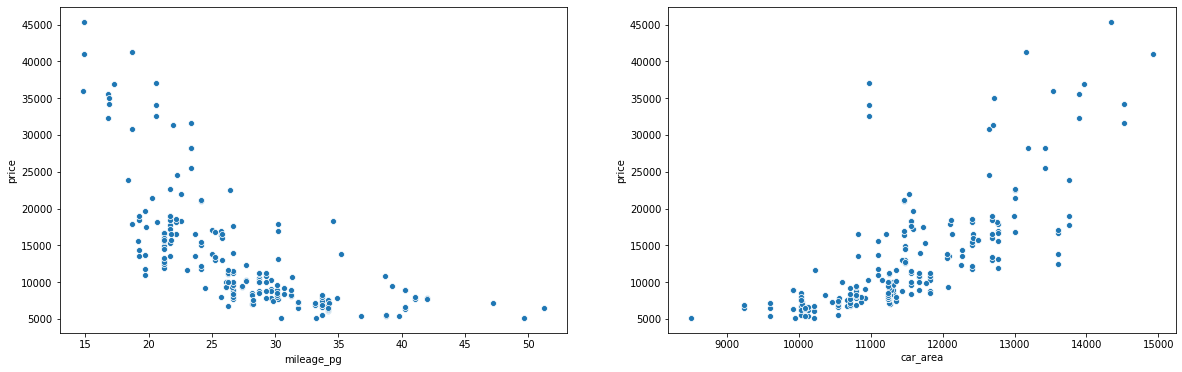

In [21]:
# increase figure size 
plt.figure(figsize=(20,6))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

#ploting the variables against price
plt.subplot(1,2,1)
sns.scatterplot(x="mileage_pg",y="price",data=df)

plt.subplot(1,2,2)
sns.scatterplot(x="car_area",y="price",data=df)

plt.show()

#### Inference
- We can observe that milege_pg and car_area are linearly varying with price but in opposite direction

In [22]:
df_lr=df[["wheelbase","carsrange","car_area","curbweight","enginesize","boreratio","enginetype","horsepower","mileage_pg","carlength","carwidth","cylindernumber","fueltype","aspiration","carbody","drivewheel","price"]]
df_lr.shape

(205, 17)

##### The final variables we are using for the liner regression model are
- wheelbase
- carsrange
- carlength
- carwidth
- car_area
- curbweight
- enginesize
- boreratio
- enginetype
- horsepower
- mileage_pg
- cylindernumber
- fueltype
- aspiration
- carbody
- drivewheel
- price

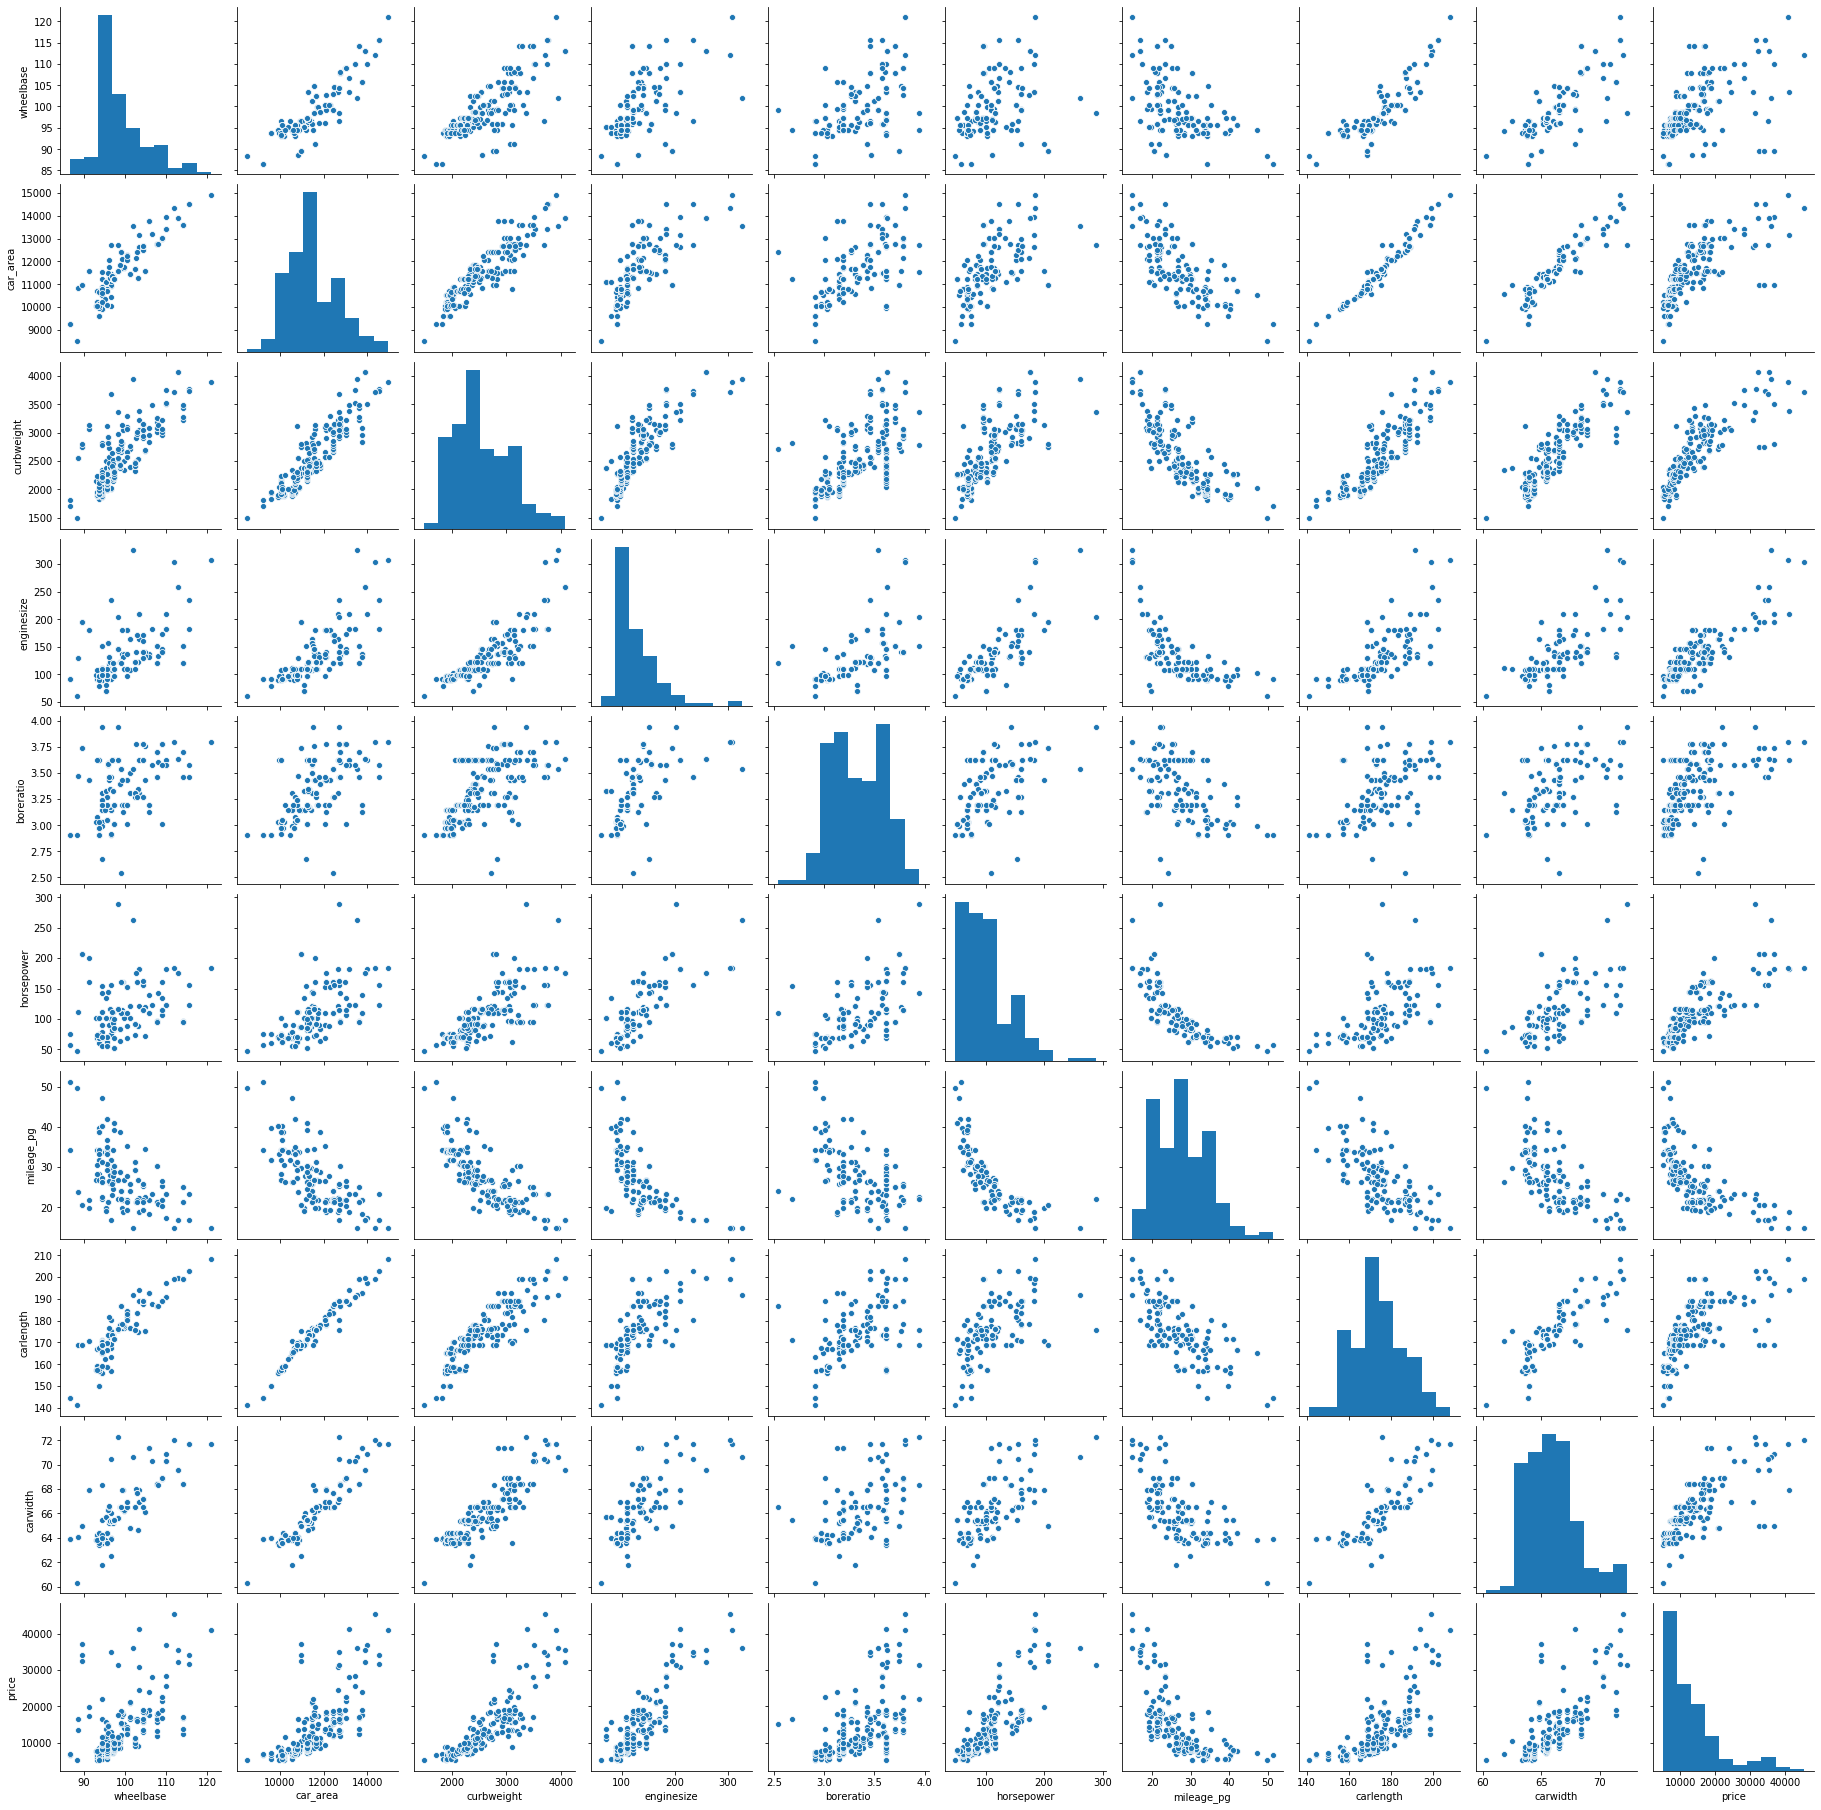

In [23]:
sns.pairplot(df_lr)

#### Creating Dummy variables for categorical variables

In [24]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
df_lr=dummies("cylindernumber",df_lr)
df_lr=dummies('fueltype',df_lr)
df_lr=dummies('aspiration',df_lr)
df_lr=dummies('carbody',df_lr)
df_lr=dummies('drivewheel',df_lr)
df_lr=dummies('enginetype',df_lr)
df_lr=dummies('carsrange',df_lr)

In [25]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train,df_test=train_test_split(df_lr,train_size=0.7,random_state=100)

In [26]:
print(df_train.shape)
print(df_test.shape)

(143, 32)
(62, 32)


In [27]:
df_train.head()

,wheelbase,car_area,curbweight,enginesize,boreratio,horsepower,mileage_pg,carlength,carwidth,price,...,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,medium,luxury
122,93.7,10673.74,2191,98,2.97,68,34.15,167.3,63.8,7609,...,1,0,0,0,1,0,0,0,0,0
125,94.5,11535.87,2778,151,3.94,143,22.60,168.9,68.3,22018,...,0,1,0,0,1,0,0,0,0,1
166,94.5,10796.80,2300,98,3.24,112,27.35,168.7,64.0,9538,...,0,1,0,0,0,0,0,0,0,0
1,88.6,10820.08,2548,130,3.47,111,23.70,168.8,64.1,16500,...,0,1,0,0,0,0,0,0,0,0
199,104.3,12687.36,3157,130,3.62,162,19.25,188.8,67.2,18950,...,0,1,0,0,1,0,0,0,1,0


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['wheelbase',"car_area","curbweight","enginesize","mileage_pg","boreratio" ,"horsepower",'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.describe()

,wheelbase,car_area,curbweight,enginesize,boreratio,horsepower,mileage_pg,carlength,carwidth,price,...,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,medium,luxury
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.487339,0.407878,0.241351,0.497946,0.227302,0.358265,173.416783,65.839860,0.219309,...,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.076923,0.118881
std,0.205581,0.196640,0.211269,0.154619,0.207140,0.165511,0.185980,12.598122,2.214203,0.215682,...,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.267406,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,141.100000,60.300000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.340464,0.245539,0.135849,0.305556,0.091667,0.198903,165.650000,63.950000,0.067298,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341379,0.459719,0.355702,0.184906,0.500000,0.191667,0.344307,172.000000,65.400000,0.140343,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.503448,0.626041,0.559542,0.301887,0.682540,0.283333,0.512346,182.300000,66.900000,0.313479,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,202.600000,72.300000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 1080x1080 with 0 Axes>

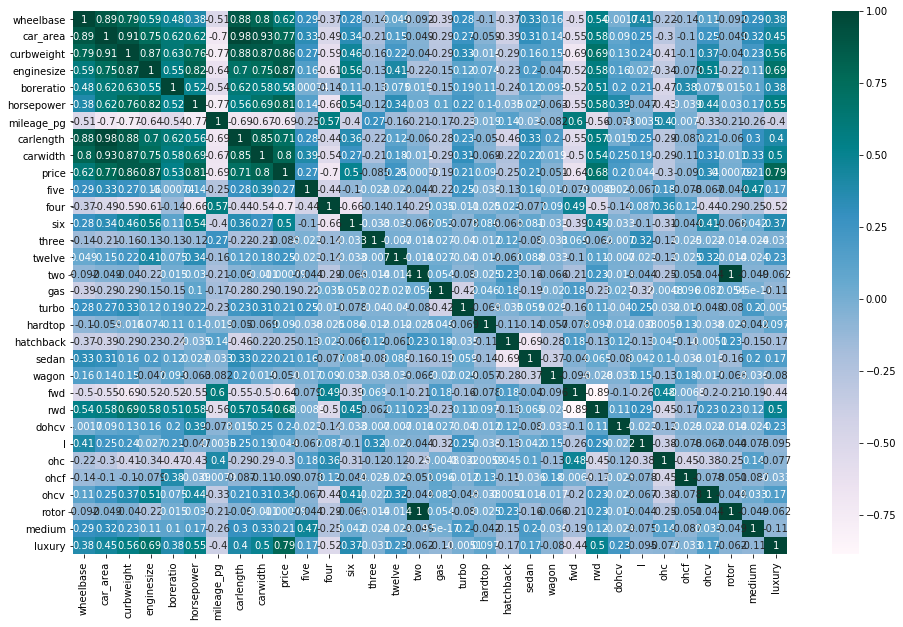

In [29]:
plt.figure(figsize=(15, 15))
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="PuBuGn")
plt.show()

#### Inference
- We can observe that price is  highly correlated with luxury, car_ara, carlength, carwidth, horsepwer, wheelbase, enginesize, boreratio

In [30]:
#dividing X and y train
y_train = df_train.pop('price')
X_train = df_train

In [31]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
#building model
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 7),
 ('car_area', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 15),
 ('boreratio', True, 1),
 ('horsepower', True, 1),
 ('mileage_pg', False, 16),
 ('carlength', False, 8),
 ('carwidth', False, 6),
 ('five', False, 5),
 ('four', False, 20),
 ('six', False, 21),
 ('three', False, 17),
 ('twelve', False, 3),
 ('two', False, 2),
 ('gas', False, 4),
 ('turbo', False, 14),
 ('hardtop', False, 9),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 18),
 ('rwd', False, 19),
 ('dohcv', True, 1),
 ('l', False, 13),
 ('ohc', False, 12),
 ('ohcf', False, 11),
 ('ohcv', False, 22),
 ('rotor', False, 10),
 ('medium', True, 1),
 ('luxury', True, 1)]

In [34]:
col = X_train.columns[rfe.support_]
col

Index(['car_area', 'curbweight', 'boreratio', 'horsepower', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'medium', 'luxury'],
      dtype='object')

In [35]:
X_train.columns[~rfe.support_]

Index(['wheelbase', 'enginesize', 'mileage_pg', 'carlength', 'carwidth',
       'five', 'four', 'six', 'three', 'twelve', 'two', 'gas', 'turbo',
       'hardtop', 'fwd', 'rwd', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'],
      dtype='object')

In [36]:
# Creating the function for building model
def build_model(X,y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit() 
    print(lm.summary())
    return X 

#Creating the model for checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def check_vif(X):
 X = X.drop(['const'], axis=1)   
 vif = pd.DataFrame()
 vif['Features'] = X.columns
 vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 vif['VIF'] = round(vif['VIF'], 2)
 vif = vif.sort_values(by = "VIF", ascending = False)
 return vif

In [37]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_new=build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     185.1
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.50e-72
Time:                        22:45:01   Log-Likelihood:                 210.69
No. Observations:                 143   AIC:                            -399.4
Df Residuals:                     132   BIC:                            -366.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0133      0.027      0.492      0.6

In [38]:
## checking the vif for all variables 
check_vif(X_train_new)

,Features,VIF
0,car_area,62.51
1,curbweight,53.86
2,boreratio,10.90
3,horsepower,10.67
5,sedan,6.05
4,hatchback,3.00
6,wagon,2.56
9,luxury,2.06
8,medium,1.38
7,dohcv,1.34


#### Dropping car_area because it have vif>5

In [39]:
X_train_new = X_train_new.drop(['car_area'], axis=1)

#building the model
X_train_new=build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     197.5
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.99e-72
Time:                        22:45:01   Log-Likelihood:                 207.47
No. Observations:                 143   AIC:                            -394.9
Df Residuals:                     133   BIC:                            -365.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0202      0.027      0.737      0.4

In [40]:
## checking the vif for all variables 
check_vif(X_train_new)

,Features,VIF
0,curbweight,19.89
2,horsepower,10.38
1,boreratio,10.01
4,sedan,3.89
3,hatchback,2.42
5,wagon,2.20
8,luxury,2.04
6,dohcv,1.34
7,medium,1.31


#### Dropping curbweight because it have vif>5

In [41]:
X_train_new = X_train_new.drop(['curbweight'], axis=1)

#building the model
X_train_new=build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     127.2
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           9.57e-59
Time:                        22:45:01   Log-Likelihood:                 170.77
No. Observations:                 143   AIC:                            -323.5
Df Residuals:                     134   BIC:                            -296.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0320      0.035      0.907      0.3

#### Dropping wagon because it have p_value>0.05

In [42]:
X_train_new = X_train_new.drop(['wagon'], axis=1)

#building the model
X_train_new=build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     145.4
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.20e-59
Time:                        22:45:01   Log-Likelihood:                 170.29
No. Observations:                 143   AIC:                            -324.6
Df Residuals:                     135   BIC:                            -300.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0076      0.024      0.313      0.7

In [43]:
## checking the vif for all variables 
check_vif(X_train_new)

,Features,VIF
1,horsepower,5.94
0,boreratio,5.70
3,sedan,2.43
6,luxury,1.81
2,hatchback,1.80
5,medium,1.26
4,dohcv,1.18


#### Dropping sedan because it have p_value>0.05

In [44]:
X_train_new = X_train_new.drop(['sedan'], axis=1)

#building the model
X_train_new=build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     170.7
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           9.27e-61
Time:                        22:45:01   Log-Likelihood:                 170.23
No. Observations:                 143   AIC:                            -326.5
Df Residuals:                     136   BIC:                            -305.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0027      0.019      0.137      0.8

In [45]:
## checking the vif for all variables 
check_vif(X_train_new)

,Features,VIF
1,horsepower,5.93
0,boreratio,4.27
5,luxury,1.81
2,hatchback,1.45
4,medium,1.24
3,dohcv,1.17


#### Dropping boreratio because it have p_value>0.05

In [46]:
X_train_new = X_train_new.drop(['boreratio'], axis=1)

#building the model
X_train_new=build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     200.9
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           3.08e-61
Time:                        22:45:02   Log-Likelihood:                 168.54
No. Observations:                 143   AIC:                            -325.1
Df Residuals:                     137   BIC:                            -307.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0291      0.013      2.299      0.0

In [47]:
## checking the vif for all variables 
check_vif(X_train_new)

,Features,VIF
0,horsepower,2.62
4,luxury,1.80
1,hatchback,1.42
3,medium,1.24
2,dohcv,1.11


### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [48]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

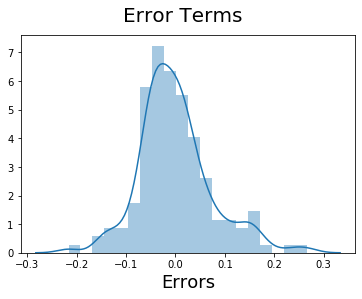

In [49]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [50]:
num_vars = ['wheelbase', 'car_area',"curbweight","enginesize","mileage_pg","boreratio" ,'horsepower','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.describe()

,wheelbase,car_area,curbweight,enginesize,boreratio,horsepower,mileage_pg,carlength,carwidth,price,...,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,medium,luxury
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000
mean,0.437764,0.516007,0.428470,0.265673,0.556580,0.248858,0.344661,175.508065,66.064516,0.239439,...,0.564516,0.419355,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.129032,0.112903
std,0.212861,0.181364,0.179488,0.162820,0.228484,0.163376,0.175037,11.681726,1.985282,0.233076,...,0.499868,0.497482,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.337972,0.319058
min,0.000000,0.121568,0.128394,0.067925,-0.111111,0.016667,0.002743,144.600000,62.500000,0.007763,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.313793,0.410457,0.305275,0.177358,0.404762,0.107292,0.192387,169.350000,64.600000,0.092342,...,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.387931,0.494315,0.406129,0.226415,0.563492,0.218750,0.326475,174.800000,65.600000,0.158991,...,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.570690,0.636605,0.564876,0.316038,0.746032,0.295833,0.451303,185.375000,66.500000,0.317243,...,1.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,1.182759,1.065527,0.935609,0.932075,0.888889,0.662500,0.747599,208.100000,72.000000,1.112855,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


##### Dividing test set

In [51]:
y_test = df_test.pop('price')
X_test = df_test

In [52]:
#Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

#Making predictions using the last model
y_pred = lm.predict(X_test_new)

### Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

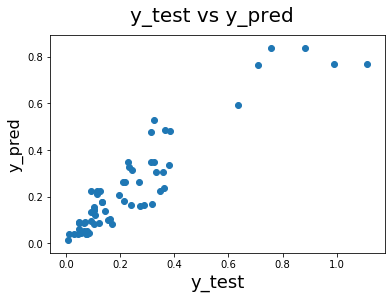

In [53]:
#Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [54]:
from sklearn.metrics import r2_score 
print(r2_score(y_test, y_pred))

0.8525185951345974


The differnce between r2_score value of train_set and test_set is approx 0.03 we can keep this model


We can see that the equation of our best fitted line is:

$price = 0.0291+0.6918  \times  horsepower - 0.0475  \times  hatchback - 0.2945 \times dohcv + 0.1296 \times medium + 0.3471 \times luxury$



#### Conclusion
We got the final model with variables dohcv, mdeium, horsepower, hatchback,  luxury.
This are the variable which are impactingt the car price most.